In [1]:
from pandas_datareader.data import DataReader
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

start_date = dt.date(2020, 1, 1)
end_date = dt.date(2020, 10, 31)

ETIHX_holdings = pd.read_csv("data/ETIHX_holdings_20191127.csv")
RYCFX_holdings = pd.read_csv("data/RYCFX_holdings_20190930.csv")

ETIHX_holdings.head()

#preload = False  # set to False to pull data from yfinance


,title,name,ticker,is_valid,market cap ($B),market cap 2020 ($B),value_usd,pct_portfolio,payoff_profile
0,EXACT SCIENCES CORP,EXACT SCIENCES CORPORATION,EXAS,yes,13.65,15.33,19881400.0,2.237275,Long
1,ARGENX SE - ADR,Argenx SE,ARGX,yes,6.88,12.74,26210800.0,2.949529,Long
2,SAREPTA THERAPEUTICS INC,Sarepta Therapeutics Inc,SRPT,yes,9.70,11.06,37584680.0,4.229444,Long
3,GALAPAGOS NV-SPON ADR,Galapagos Nv,GLPG,yes,13.51,9.30,26410180.0,2.971966,Long
4,NEUROCRINE BIOSCIENCES IN,Neurocrine Biosciences Inc,NBIX,yes,9.92,8.97,31808830.0,3.579482,Long


In [2]:
# helper functions

def get_data_for_multiple_stocks(tickers, start_date, end_date):
    '''
    tickers: list of tickers to get data for
    start_date, end_date: dt.datetime objects
    method returns a dictionary b{ticker: pd.DataFrame}
    '''
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')
    stocks = dict()
    # loop through all the tickers
    for i, ticker in enumerate(tickers):
        if i % 5 == 0:
            print(f'{i}/{len(tickers)}')

        try:
            # get the data for the specific ticker
            s = DataReader(ticker, 'yahoo', start_date_str, end_date_str)

            s.insert(0, "Ticker", ticker)

            s['Prev Close'] = s['Adj Close'].shift(1)
            s['daily_return'] = (s['Adj Close']/s['Prev Close']) - 1
            s['log_return'] = np.log(s['Adj Close']/s['Prev Close'])
            # s['perc_return'] = (s['Adj Close']/s['Prev Close'])
            # add it to the dictionary
            stocks[ticker] = s
        except:
            print(f'something went wrong with {ticker}')
            continue

    # return the dictionary
    return stocks


def get_df_by_metric(data_dict, metric):
    '''
    data_dict: dictionary of the indiv ticker data
    
    metric: the metric of the data you want (eg. Adj Close)
    
    returns pd.DataFrame with each column representing one ticker
    '''
    output = pd.DataFrame()

    for k, v in data_dict.items():
        output[k] = v[metric]

    output.dropna(how='all', inplace=True)
    return output


In [3]:
# save data to dict, no need to call from yfinance next time
import pickle
from pathlib import Path

ETIHX_path = Path(r"data/ETIHX_assets_2020.pickle")
RYCFX_path = Path(r'data/RYCFX_assets_2020.pickle')
preload = True

if preload:
    # load the pickle file
    with open(ETIHX_path, 'rb') as handle1:
        ETIHX_assets = pickle.load(handle1)
    
    with open(RYCFX_path, 'rb') as handle2:
        RYCFX_assets = pickle.load(handle2)

else:
    # else dump the pickle files
    with open(ETIHX_path, 'wb') as handle1:
        pickle.dump(ETIHX_assets, handle1)
    
    with open(RYCFX_path, 'wb') as handle2:
        pickle.dump(RYCFX_assets, handle2)


In [4]:
ETIHX_log_returns_df = get_df_by_metric(ETIHX_assets, 'log_return')
ETIHX_log_returns_df.tail()

,EXAS,ARGX,SRPT,GLPG,NBIX,ASND,MRTX,MYOK,MNTA,BPMC,...,QURE,MYOV,RCKT,ZGNX,COLL,CRNX,AVRO,XENE,MGTA,RAFA
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-22,0.072407,-0.017916,0.003926,0.004701,0.007382,0.021431,-0.025687,-0.001170,NaN,0.026211,...,0.043593,0.034883,0.046537,0.024098,0.012115,0.031307,0.060587,-0.003817,0.038938,-0.023670
2020-10-23,0.024080,-0.007242,-0.000508,0.031595,0.025367,0.002131,-0.000277,0.003729,NaN,0.017833,...,0.032665,0.023019,-0.024775,0.013715,0.012487,-0.046259,0.010850,0.024553,-0.002833,0.219544
2020-10-26,-0.028947,-0.004001,0.006441,-0.002981,0.019305,-0.007162,0.087511,0.000135,NaN,-0.014434,...,0.019053,-0.037351,0.024428,-0.026656,-0.024602,-0.110635,-0.030434,-0.021689,-0.043485,-0.172752
2020-10-27,0.207311,0.037033,0.007188,0.005876,-0.007957,0.034819,0.061522,-0.000404,NaN,0.018439,...,-0.029665,0.007843,0.002428,-0.006291,-0.027399,0.053814,-0.004957,-0.040862,-0.023989,0.011364
2020-10-28,-0.027840,-0.017499,0.005072,-0.059707,-0.016107,-0.019491,-0.033595,-0.000471,NaN,-0.004387,...,-0.082238,-0.047326,-0.036329,-0.008776,-0.019803,-0.065095,-0.097113,-0.059322,0.032839,0.016807


In [5]:
# get value held for each asset in ETIHX portfolio
ETIHX_weights = {}
for ticker in ETIHX_log_returns_df.columns:
    ETIHX_weights[ticker] = ETIHX_holdings[ETIHX_holdings['ticker']==ticker]['value_usd'].values[0]
    
# normalize weights
total_value = sum(ETIHX_weights.values())
for k,v in ETIHX_weights.items():
    ETIHX_weights[k] = v / total_value
    
ETIHX_weights = pd.Series(ETIHX_weights)

all(ETIHX_log_returns_df.columns == ETIHX_weights.index)  # check



True

In [6]:
# get value held for each asset in RYCFX portfolio
RYCFX_weights = {}
RYCFX_log_returns_df = get_df_by_metric(RYCFX_assets, 'log_return')

for ticker in RYCFX_log_returns_df.columns:
    RYCFX_weights[ticker] = RYCFX_holdings[RYCFX_holdings['ticker']==ticker]['value_usd'].values[0]
    
# normalize weights
total_value = sum(RYCFX_weights.values())
for k,v in RYCFX_weights.items():
    RYCFX_weights[k] = v / total_value
    
RYCFX_weights = pd.Series(RYCFX_weights)

all(RYCFX_log_returns_df.columns == RYCFX_weights.index)  # check



True

In [7]:
# get data for index
index_data = get_data_for_multiple_stocks(['^NBI'], dt.date(2020, 1, 1), dt.date(2020, 10, 31))
index_log_returns_df = get_df_by_metric(index_data, 'log_return')
index_weights = pd.Series([1], index=['^NBI'])
index_log_returns_df.head()

0/1


,^NBI
Date,
2020-01-02,-0.006223
2020-01-03,-0.012770
2020-01-06,0.007543
2020-01-07,0.000459
2020-01-08,0.008948


####  Load weights for optimal portfolio

In [8]:
import pickle
from pathlib import Path

optimised_weights_path = Path("data/optimised_weights.pickle")
with open(optimised_weights_path, 'rb') as handle:
    optimised_weights = pickle.load(handle)

optimised_weights.sort_values(ascending=False)

GWPH    0.184
CRNX    0.145
FOLD    0.104
AIMT    0.082
EXAS    0.066
NBIX    0.057
ZGNX    0.049
BHVN    0.048
XNCR    0.047
COLL    0.042
GLPG    0.034
XENE    0.027
AVRO    0.024
GBT     0.016
MNTA    0.016
ASND    0.016
ARGX    0.014
SRPT    0.013
MYOV    0.009
RAFA    0.006
SAGE    0.002
MGTA    0.000
VCYT    0.000
QURE    0.000
BPMC    0.000
MYOK    0.000
MRTX    0.000
RCKT    0.000
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

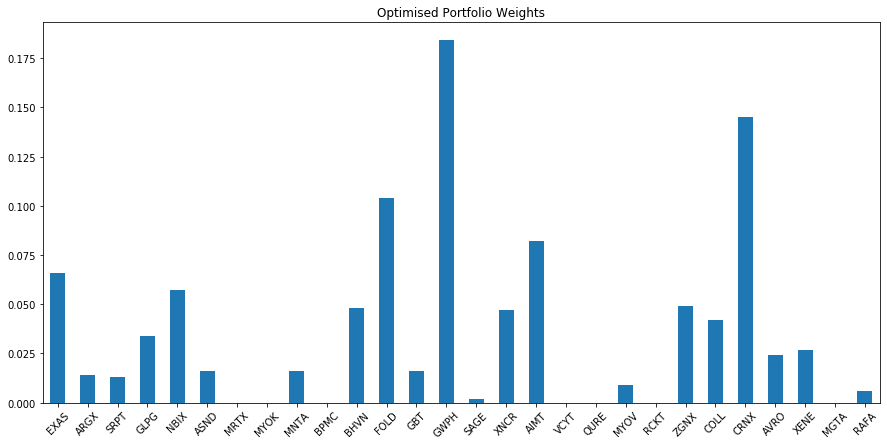

In [9]:
optimised_weights.plot(kind='bar', title='Optimised Portfolio Weights', figsize=(15, 7))
plt.xticks(rotation='45')

In [40]:
def get_returns_risk_sharpe(returns_data, weights, rf_rate,
                            plot_returns=False, portfolio_name=""):
    '''
    returns_data is a pd.DataFrame containing the log returns for the various assets in the portfolio
    weights is a pd.Series containing the percentage of each holding
    plot_returns: set to True to show plot of portfolio value over time
    rf_rate: the annualised risk free rate for the period of the returns
    
    this function calculates the annualised returns (in excess of risk free rate), \
        risk and sharpe ratio
    '''
    
    if not all(returns_data.columns == weights.index):
        print ('please align the indexes for weights and returns data')
        return
    
    n_days = returns_data.shape[0]
    
    # portfolio return
    returns = np.dot(weights, np.exp(returns_data.T.values) - 1)  # portfolio simple returns
    
    compounded_returns = np.cumprod(1 + returns)
    final_return = compounded_returns[-1]
    
    return_daily = np.exp(np.log(final_return) / n_days) - 1
    return_yearly = (1 + return_daily) ** 252 - 1
    return_yearly -= rf_rate
    
    # portfolio variance
    sd = np.std(returns)
    annualised_sd = np.sqrt(252) * sd
        
    sharpe_ratio = return_yearly / annualised_sd
    
    if plot_returns:
        plt.figure(figsize=(20, 10))
        plt.plot(returns_data.index, compounded_returns, 'r--', label='returns')
        plt.axhline(y=1, color='black', linestyle='--')
        plt.grid(True)
        plt.ylabel(f'Portfolio Value')
        plt.xlabel('Date')
        plt.title(f"{portfolio_name} Portfolio Value over Time")
        plt.show()

    return return_yearly, annualised_sd, sharpe_ratio

In [19]:
yield_df = pd.read_csv("data/yield_rate_2020.csv")
yield_df.drop(yield_df.columns.difference(['Date','1 Yr']), 1, inplace=True)

yield_df['1 Yr'] = yield_df['1 Yr'].apply(lambda x: x / 100)
yield_df['Date'] = pd.to_datetime(yield_df['Date'])
yield_df.set_index("Date", inplace=True)
yield_df.rename(columns={'1 Yr': 'risk_free_rate'}, inplace=True)
yield_df.head()

,risk_free_rate
Date,
2020-01-02,0.0156
2020-01-03,0.0155
2020-01-06,0.0154
2020-01-07,0.0153
2020-01-08,0.0155


In [39]:
rf_rate_2020 = yield_df['risk_free_rate'].mean()

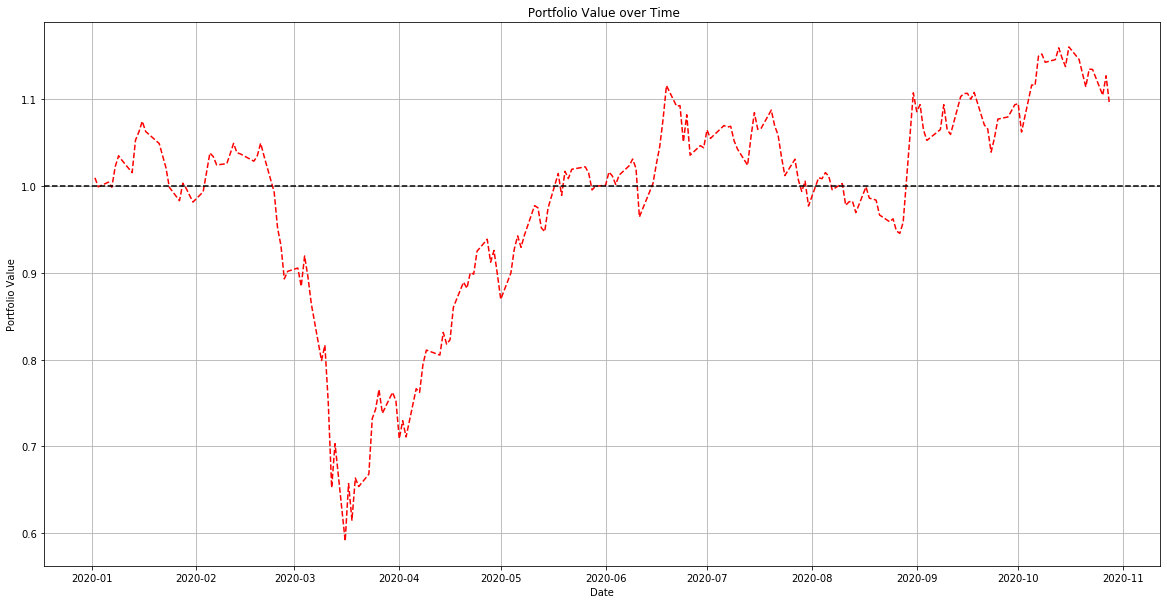

Ann. Return: 0.109865, Ann. Risk: 0.501664, Sharpe Ratio: 0.219000


In [42]:
optimal_portfolio_stats = get_returns_risk_sharpe(ETIHX_log_returns_df, optimised_weights, rf_rate_2020, True)
print("Ann. Return: %f, Ann. Risk: %f, Sharpe Ratio: %f" %optimal_portfolio_stats)

#### Calculation of VaR and ES for Best, Worst Index and Optimal Portfolio for 2020

In [43]:
from copy import deepcopy

def log_to_simple(x):
    return np.exp(x) - 1

def get_pfv(log_returns_df, weights):
    simple_returns = deepcopy(log_returns_df)
    portfolio_values = []

    for i in simple_returns.columns:
        simple_returns[i] = simple_returns[i].apply(log_to_simple)

    for i in range(simple_returns.shape[0]):
        portfolio_values.append(weights.dot(simple_returns.iloc[i]))
    
    simple_returns = simple_returns.assign(values = portfolio_values)
    return simple_returns

def get_var(log_returns_df, weights):
    df = get_pfv(log_returns_df, weights)
    historic_var = np.percentile(df['values'], 5)
    
    # convert to simple
    historic_var = np.exp(historic_var) - 1
    
    return historic_var

def get_es(log_returns_df, weights):
    df = get_pfv(log_returns_df, weights)
    threshold = get_var(log_returns_df, weights)
    df = df.loc[df['values'] <= threshold]
    
    # convert to simple
    es = np.exp(df['values'].mean()) - 1
    return df['values'].mean()

In [16]:
#MNTA and AIMT were only acquired halfway through 2020
ETIHX_log_returns_df.fillna(0, inplace = True)
RYCFX_log_returns_df.fillna(0, inplace = True)

In [48]:
# in sample VaR

print(f'VaR for Best Portfolio is {-get_var(ETIHX_log_returns_df, ETIHX_weights)} at 95% confidence level')
print(f'VaR for Worst Portfolio is {-get_var(RYCFX_log_returns_df, RYCFX_weights)} at 95% confidence level')
print(f'VaR for Optimised Portfolio is {-get_var(ETIHX_log_returns_df, optimised_weights)} at 95% confidence level')
print(f'VaR for Indexed Portfolio is {-get_var(index_log_returns_df, index_weights)} at 95% confidence level')

VaR for Best Portfolio is 0.032894994581884274 at 95% confidence level
VaR for Worst Portfolio is 0.028696122807984503 at 95% confidence level
VaR for Optimised Portfolio is 0.038580391185630614 at 95% confidence level
VaR for Indexed Portfolio is 0.025637227660130546 at 95% confidence level


In [49]:
# in sample ES
print(f'VaR for Best Portfolio is {-get_es(ETIHX_log_returns_df, ETIHX_weights)} at 95% confidence level')
print(f'VaR for Worst Portfolio is {-get_es(RYCFX_log_returns_df, RYCFX_weights)} at 95% confidence level')
print(f'VaR for Optimised Portfolio is {-get_es(ETIHX_log_returns_df, optimised_weights)} at 95% confidence level')
print(f'VaR for Indexed Portfolio is {-get_es(index_log_returns_df, index_weights)} at 95% confidence level')

VaR for Best Portfolio is 0.06639292371455913 at 95% confidence level
VaR for Worst Portfolio is 0.048696147525326555 at 95% confidence level
VaR for Optimised Portfolio is 0.07174065146252115 at 95% confidence level
VaR for Indexed Portfolio is 0.050209872464889525 at 95% confidence level
